In [1]:
import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
!pip install opendatasets

In [4]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nikhilsn02
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:03<00:00, 209MB/s]


In [13]:
import os
import random

In [9]:
import shutil

In [27]:
start_path = "/content/gtsrb-german-traffic-sign/Train/"
end_path = "/content/sample_data/Test/"
os.mkdir("/content/sample_data/Test")

In [28]:
for i in range(40):
  start = start_path+str(i)+'/'
  end = end_path+str(i)
  os.mkdir(end)
  images = os.listdir(start)
  for i in range(10):
    img = random.choice(images)
    shutil.move(start+img,end+'/'+img)
    images.remove(img)


In [ ]:
for i in range(40):
  print(len(os.listdir(start_path+str(i))))

In [8]:
#for testing let's get 10 images from each 
path_test = "/content/sample_data"

In [ ]:

# from keras.utils import to_categorical
import tensorflow as tf


In [ ]:
%cd /content/drive/MyDrive/project-4

/content/drive/MyDrive/project-4


In [32]:
os.getcwd()

'/content'

In [38]:
data = []
labels = []
classes = 40
curr_path = "/content/gtsrb-german-traffic-sign/Train"
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(curr_path,str(i))
    images = os.listdir(path)

    for a in images:
          image = Image.open(path + '/'+ a)
          image = image.resize((30,30))
          image = np.array(image)
          #sim = Image.fromarray(image)
          data.append(image)
          labels.append(i)
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset

(37569, 30, 30, 3) (37569,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30055, 30, 30, 3) (7514, 30, 30, 3) (30055,) (7514,)


In [52]:
#Converting the labels into one hot encoding
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [53]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [47]:

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(40, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
940/940 [==============================] - 134s 141ms/step - loss: 1.9511 - accuracy: 0.4961 - val_loss: 0.6409 - val_accuracy: 0.8154
Epoch 2/15
940/940 [==============================] - 132s 140ms/step - loss: 0.8688 - accuracy: 0.7451 - val_loss: 0.3631 - val_accuracy: 0.9001
Epoch 3/15
940/940 [==============================] - 129s 137ms/step - loss: 0.6484 - accuracy: 0.8044 - val_loss: 0.2909 - val_accuracy: 0.9087
Epoch 4/15
940/940 [==============================] - 129s 138ms/step - loss: 0.5742 - accuracy: 0.8292 - val_loss: 0.3043 - val_accuracy: 0.9074
Epoch 5/15
940/940 [==============================] - 130s 139ms/step - loss: 0.4983 - accuracy: 0.8498 - val_loss: 0.2214 - val_accuracy: 0.9410
Epoch 6/15
940/940 [==============================] - 132s 140ms/step - loss: 0.4435 - accuracy: 0.8661 - val_loss: 0.1759 - val_accuracy: 0.9492
Epoch 7/15
940/940 [==============================] - 130s 138ms/step - loss: 0.4353 - accuracy: 0.8700 - val_loss: 0.1568 -

In [57]:
def load_and_prep_image(filename, img_shape=30):
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])
  img/=255.
  return img

In [58]:
from matplotlib import pyplot as plt
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  # predicted class
  pred_class = class_names[pred.argmax()] # if more than one output, take the max

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [63]:
image = Image.open("/content/00023_00010_00025.png")
image = image.resize((30,30))
image = np.array(image)
image = np.expand_dims(image,axis=0)
pred = model.predict(image)
np.argmax(pred)

23

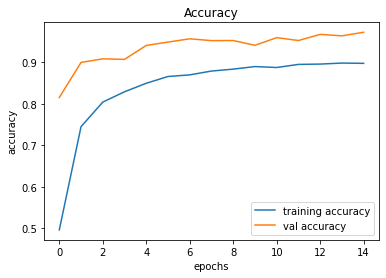

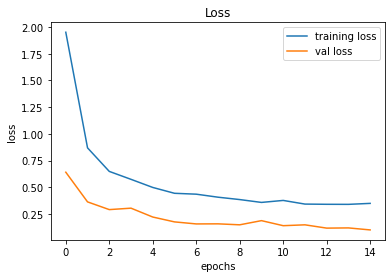

In [64]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:


#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save('traffic_classifier.h5')